In [ ]:
# Implement the Cleaning class in Home-Credit-Prediction/homecredit/cleaner.py

In [1]:

import os
import sys
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit

from homecredit.preparation import Preparation

In [3]:
class Cleaning:
    
    def __init__(self):
        path_dir = (os.path.dirname(os.getcwd()))
        sys.path.append(path_dir)
        # Assign an attribute ".data" to all new instances of Preparation
        #self.data = HomeCredit().get_data()['train'].copy() # good practice to be sure not to modify your `data` variable
        self.data = Preparation().data
        self.catcols = Preparation().get_catcols()
        self.numcols = Preparation().get_numcols()
        
    def get_count_missvalues(self):
        missing_df = pd.DataFrame(self.data.isnull().sum().sort_values(ascending=False))
        return missing_df
    
    
    def get_percentage_missvalues(self):
        ratio = pd.DataFrame(
            (self.data.isnull().sum().sort_values(ascending=False))/ self.data.shape[0])
        return ratio
    
    
    def plot_missvalues_table(self, na_name=False): # self : dataframe
                                            # if na_names: print the features list  
    
        na_cols = [col for col in self.data.columns if self.data[col].isnull().sum() > 0]

        count = self.data[na_cols].isnull().sum().sort_values(ascending=False)
        ratio = ( self.data[na_cols].isnull().sum() / self.data.shape[0] * 100 ).sort_values(ascending=False)
        missing_df = pd.concat([count, np.round(ratio, 2)], axis=1, keys=['Number of missing values', 'Percent'])

        f,ax =plt.subplots(figsize=(19, 10))
        plt.xticks(rotation='90')
        fig=sns.barplot(missing_df.index, missing_df["Percent"])
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15);

        return na_cols if na_name else missing_df # na_cols : list, missing_df : dataframe
    
    
    # Remove entries 
    def remove_entries(self):
        self.data = self.data[self.data['CODE_GENDER'] != 'XNA'] # with gender = XNA
        self.data = self.data[self.data['NAME_FAMILY_STATUS'] != 'Unknown'] # 'Unknown' status
        # Remove entries with DAYS_EMPLOYED > 200_000
        self.data = self.data[self.data['DAYS_EMPLOYED'] < 200_000]
        self.data = self.data[self.data['AMT_ANNUITY'] < 150_000]
        self.data = self.data[self.data['AMT_GOODS_PRICE'] < 2.5* 10**6]  
        self.data = self.data[self.data['OWN_CAR_AGE'] < 45]
        return self.data
    
    def remove_missvalues(self):
        
        df = self.remove_entries()
        # Categorical Variables
        df[self.catcols].fillna('', inplace=True)

        # Replace the NaNs in numerical column by the mean of values
        # in numerical column respectively
        df[self.numcols] = self.data[self.numcols].fillna(value=df[self.numcols].mean())
        return df

In [4]:
cl = Cleaning()

In [5]:
cl.catcols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [6]:
cl.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cl.data.shape

(307511, 122)

In [9]:
cl.get_count_missvalues()

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


In [10]:
cl.get_percentage_missvalues()

,0
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


In [11]:
cl.data.isnull().sum().sum()

9152465

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00


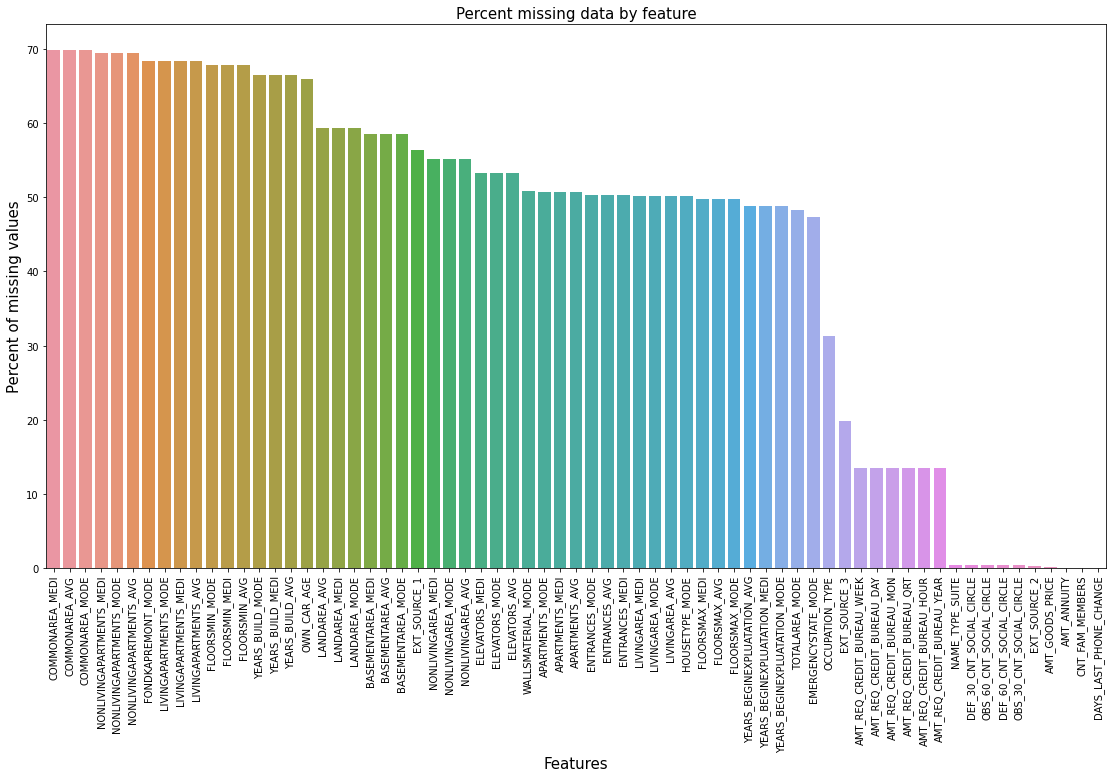

In [12]:
cl.plot_missvalues_table()

In [13]:
cl.remove_entries().head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


In [14]:
cl.data.shape

(91206, 122)

In [15]:
cl.data.isnull().sum().sum()

2687650

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MEDI,64482,70.70
COMMONAREA_MODE,64482,70.70
COMMONAREA_AVG,64482,70.70
NONLIVINGAPARTMENTS_MODE,64044,70.22
NONLIVINGAPARTMENTS_MEDI,64044,70.22
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,300,0.33
DEF_30_CNT_SOCIAL_CIRCLE,300,0.33
OBS_30_CNT_SOCIAL_CIRCLE,300,0.33
EXT_SOURCE_2,149,0.16


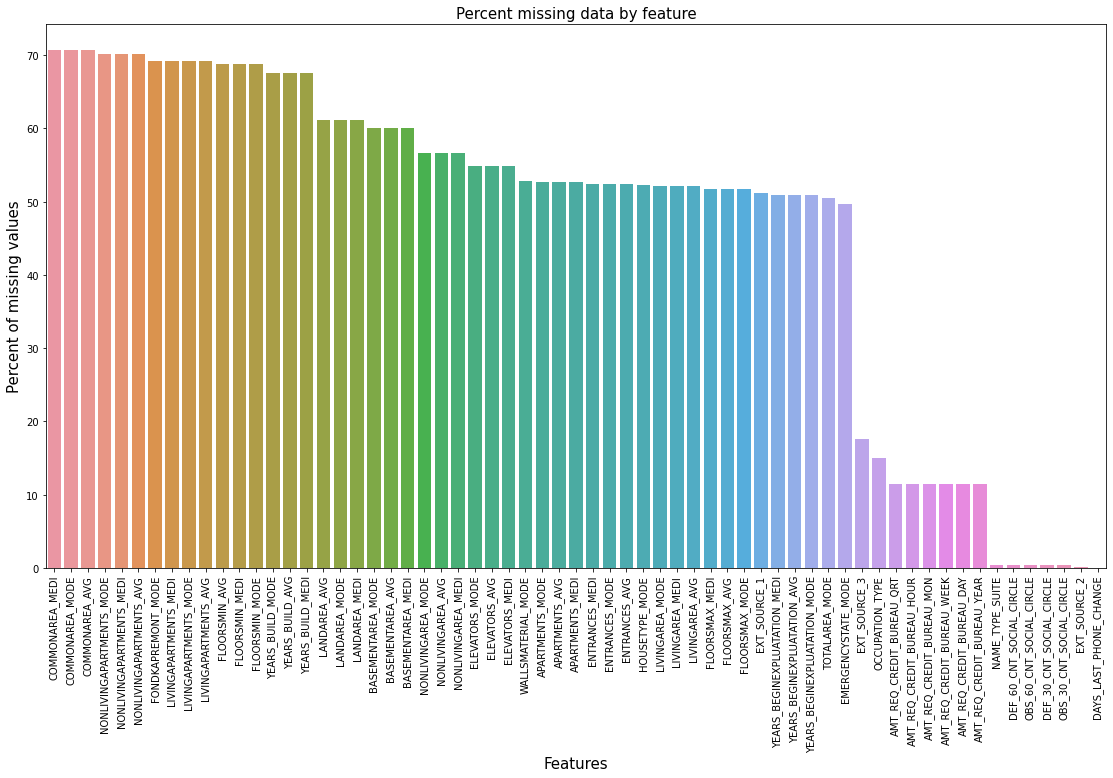

In [16]:
cl.plot_missvalues_table()

In [17]:
cl.remove_missvalues()

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


In [18]:
cl.data.shape

(91206, 122)

In [19]:
cl.data.isnull().sum().sum()

218277

In [20]:
tt = Cleaning()

In [21]:
tt.data.isnull().sum().sum()

9152465

In [22]:
tt.remove_missvalues()

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


In [23]:
tt.data.isnull().sum().sum()

218277